In [1]:
import pandas as pd 
import requests
import collections
import json
import numpy as np

### Collect the data
First step is to collect the data from relevant sources and group them into dataframes.

In [2]:
# Read files
file_url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'


df_tw_en = pd.read_csv('twitter-archive-enhanced.csv')
r = requests.get(file_url)
r_content=r.content

In [3]:
file = open("image-predictions.tsv","w") 
s=str(r_content,'utf-8')
file.write(s)
df_img_pred=pd.read_csv('image-predictions.tsv',sep='\t')

In [4]:
tweets_all=[]
with open('tweet-json') as json_file:
    #data = json.load(json_file)
    for line in json_file:
        d=json_file.readline()
        data = json.loads(d)
        tweet_row = collections.OrderedDict()
       
        tweet_row['tweet_id'] = data['id']
        tweet_row['retweet_count'] = data['retweet_count']
        tweet_row['favorite_count'] = data['favorite_count']
        
        tweets_all.append(tweet_row)
       

In [5]:
df_tweets = pd.DataFrame(tweets_all)

### DATA in hand
Currently we have 3 dataframes with data.
- __df_tw_en__ containing enhanced data for tweets 
- __df_img_pred__ containing image predictions
- __df_tweets__ containing extracted data from tweets (tweet id , retweets and favorites)

### ASSESS
Currently we will assess the data visually and programmatically 

#### VISUAL ASSESSMENT

In [6]:
df_tw_en

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [7]:
df_tw_en['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [8]:
df_tw_en.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [9]:
df_tw_en.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

#### df_tw_en 
##### Quality issues

- Source column is not significant to what we need. Displaying a link to the download page of twitter.
- Name Column , some names have a, an and none as values where names such as a, an do not represent a real name and None are misleading to the analysis and should be replaced by NaNs

##### Tidiness Issues

- doggo,floofer,pupper,puppo columns are expressing the same data (dog type) and should be combined to 1 columm


In [10]:
df_tweets

,tweet_id,retweet_count,favorite_count
0,892177421306343426,6514,33819
1,891689557279858688,8964,42908
2,891087950875897856,3261,20562
3,890729181411237888,16716,56848
4,890240255349198849,7711,32467
5,889880896479866881,5156,28268
6,889638837579907072,4735,27672
7,889278841981685760,5637,25652
8,888804989199671297,4559,26080
9,888078434458587136,3653,22201


#### df_tweets 
##### Quality issues

- From visual inspection nothing seems to stand out. potential issues would be a miscount of retweets or favorites but nothing clear from quality prespective

##### Tidiness Issues

- The data her is giving extra data on the tweets data in df_tw_en, hence merging both dataframes would be optimal as a single source of analysis


In [11]:
df_img_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


#### df_img_pred Visual Assessment
##### Quality issues

- Predicted dog names column has values with "_" which isn't really visually significant

##### Tidiness Issues

- The data here is showing image prediction on the tweets to predict the doc type in the tweet Comnbining this data to df_tw_en, byb merging both dataframes would be optimal as a single source of analysis


#### Programmatic Assessment

In [12]:
df_tw_en.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
type(df_tw_en['source'][1])

str

#### df_tw_en Programmatic Assessment 
##### Quality issues

- All ID columns (tweet_id,in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id retweeted_status_user_id) should be converted from their current datatype (int/float) to strings.
- Timestamp columns should be converted from string to datetime.
- null data in in_reply and in retweets , as well as expanded_urls



In [14]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 3 columns):
tweet_id          1177 non-null int64
retweet_count     1177 non-null int64
favorite_count    1177 non-null int64
dtypes: int64(3)
memory usage: 27.7 KB


#### df_tweets Programmatic Assessment 
##### Quality issues

- All ID columns (tweet_id) should be converted from their current datatype (int) to string.
- Data seems to be less than data in df_tw_en (1177 vs 2356) -> Potential missing data



In [15]:
df_img_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### df_img_pred Programmatic Assessment 
##### Quality issues

- All ID columns (tweet_id) should be converted from their current datatype (int) to string.
- Data seems to be slightly less than data in df_tw_en (2075 vs 2356) -> Potential missing data



#### Duplicated data

In [16]:
print('Duplicated rows in df_tw_en: ',sum(df_tw_en.duplicated()))
print('Duplicated rows in df_tweets: ',sum(df_tweets.duplicated()))
print('Duplicated rows in df_img_pred: ',sum(df_img_pred.duplicated()))

print('Duplicated tweetIDs in df_tw_en : ',sum(df_tw_en['tweet_id'].duplicated()))
print('Duplicated tweetIDs in df_tweets: ',sum(df_tweets['tweet_id'].duplicated()))
print('Duplicated tweetIDs in df_img_pred: ',sum(df_img_pred['tweet_id'].duplicated()))


Duplicated rows in df_tw_en:  0
Duplicated rows in df_tweets:  0
Duplicated rows in df_img_pred:  0
Duplicated tweetIDs in df_tw_en :  0
Duplicated tweetIDs in df_tweets:  0
Duplicated tweetIDs in df_img_pred:  0


#### Duplicated results
There doesnt seem to be any duplicated data in all 3 dataframes we are using. Even while checking on duplicated tweets ID, there seems to be no duplicated tweetIDs which is a good indicator.

#### Accuracy of Data

In [17]:
df_tw_en.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [18]:
df_tw_en[['rating_numerator','rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [19]:
# tweet with rating_denominator value of 0
tweet_zero_den = df_tw_en.loc[df_tw_en.rating_denominator == 0]
tweet_zero_den

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [20]:
print(list(tweet_zero_den['text']))

["@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"]


In [21]:
df_tw_en.rating_numerator.value_counts()


12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [22]:
tweet_420_den = df_tw_en.loc[df_tw_en.rating_numerator == 420]
tweet_420_den

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,194351775.0,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
2074,670842764863651840,NaN,NaN,2015-11-29 05:52:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After so many requests... here you go.\n\nGood...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670842764...,420,10,None,None,None,None,None


In [23]:
print(list(tweet_420_den['text']))

['@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research', 'After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY']


In [24]:
tweet_1776_den = df_tw_en.loc[df_tw_en.rating_numerator == 1776]
tweet_1776_den

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None


In [25]:
print(list(tweet_1776_den['text']))

["This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh"]


In [26]:
df_tw_en.rating_denominator.value_counts()


10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [27]:
tweet_g10_den = df_tw_en.loc[df_tw_en.rating_denominator > 10]
tweet_g10_den

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None


In [28]:
tweet_display=tweet_g10_den[['rating_numerator','rating_denominator','text']]

In [29]:
tweet_display['concat']="Predicted="+tweet_display['rating_numerator'].astype(str)+"/"+tweet_display['rating_denominator'].astype(str) +"  Text:"+tweet_display['text']

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [30]:
for i in (tweet_display['concat']):
    print(i)
    print("\n")

Predicted=11/15  Text:@docmisterio account started on 11/15/15


Predicted=84/70  Text:The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd


Predicted=9/11  Text:RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…


Predicted=165/150  Text:Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE


Predicted=9/11  Text:After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ


Predicted=204/170  Text:Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv


Predicted=4/20  Text:Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a


Predicted=50/50  Text:This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq




#### df_tw_en Data Accuracy 

Using describe on the whole df isn't meaningfull given that most of the columns are IDs. Though no weird / unexpected number appeared for the ID columns which is a good indicator. 

##### Focusing on numerator and denominator:
- Denominator couldn't have minumum of 0 , all denominator values should be 10.
- max of numerator (1776) is too large from the distribution
- max of denominator (170) is too large and should be 10
- wrong extract , data and not rating @docmisterio account started on 11/15/15


In [31]:
df_tweets[['retweet_count', 'favorite_count']].describe()


,retweet_count,favorite_count
count,1177.000000,1177.000000
mean,3107.338997,7901.181818
std,5458.476288,11536.383916
min,2.000000,0.000000
25%,613.000000,1339.000000
50%,1460.000000,3553.000000
75%,3628.000000,9872.000000
max,79515.000000,131075.000000


#### df_tweets Data Accuracy 

Nothing stands out in the df_tweets dataframe from data accuracy

In [32]:
df_img_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


#### df_img_pred Data Accuracy 

Nothing stands out in the df_img_pred dataframe from data accuracy, all confidence ranges are betwee 0 and 1 reflecting 100% confidence interval.

### CLEAN

In [33]:
# Create copies of dataframes
df_tweets_clean = df_tweets.copy()
df_tw_en_clean = df_tw_en.copy()
df_img_pred_clean = df_img_pred.copy()

#### Define
Change datatypes for dataframes. 
- All ID columns to be Strings 
- Timestamps to be datetime

#### df_tw_en_clean Change Datatypes

#### Code

In [34]:
id_cols=['tweet_id','in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id']
ts_cols=['timestamp','retweeted_status_timestamp']

In [35]:
df_tw_en_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [36]:
for x in id_cols:
    if df_tw_en_clean[x].dtype == 'float64':
        df_tw_en_clean[x] = df_tw_en_clean[x].fillna(0)
        df_tw_en_clean[x] = df_tw_en_clean[x].astype(int)
    df_tw_en_clean[x] = df_tw_en_clean[x].astype(str)
    df_tw_en_clean[x] = df_tw_en_clean[x].replace('0',np.nan)

In [37]:
for x in ts_cols:
    df_tw_en_clean[x] = pd.to_datetime(df_tw_en_clean[x])


#### Test

In [38]:
df_tw_en_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null object
in_reply_to_user_id           78 non-null object
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null object
retweeted_status_user_id      181 non-null object
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[

#### df_tweets_clean Change Datatypes

#### Code

In [39]:
df_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 3 columns):
tweet_id          1177 non-null int64
retweet_count     1177 non-null int64
favorite_count    1177 non-null int64
dtypes: int64(3)
memory usage: 27.7 KB


In [40]:
df_tweets_clean['tweet_id'] = df_tweets_clean['tweet_id'].astype(str)

#### Test

In [41]:
df_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 3 columns):
tweet_id          1177 non-null object
retweet_count     1177 non-null int64
favorite_count    1177 non-null int64
dtypes: int64(2), object(1)
memory usage: 27.7+ KB


In [42]:
type(df_tweets_clean['tweet_id'][0])

str

#### df_tweets_clean Change Datatypes

#### Code

In [43]:
df_img_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [44]:
df_img_pred_clean['tweet_id']=df_img_pred_clean['tweet_id'].astype(str)

#### Test

In [45]:
df_img_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [46]:
df_img_pred_clean.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


### Define
During rating extract decimal ratings are resulting in wrong numbers, which results in wrong ratings. Fix is to extract the ratings from the text.

### Code

In [47]:
new_rating=df_tw_en_clean['text'].str.extract(r'(\d+\.\d+/\d+)|(\d+/\d+)')

In [48]:
new_rating['rating'] = new_rating[new_rating.columns[0:]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)

In [49]:
new_rating=new_rating.reset_index()

In [50]:
rating_extract=new_rating['rating'].str.split("/", expand = True)

In [51]:
df_tw_en_clean['new_num']=rating_extract[0].astype(float)
df_tw_en_clean['new_den']=rating_extract[1].astype(float)

### Test

In [52]:
df_tw_en_clean[df_tw_en_clean['rating_denominator']!=df_tw_en_clean['new_den']]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,new_num,new_den


In [53]:
df_tw_en_clean[df_tw_en_clean['rating_numerator']!=df_tw_en_clean['new_num']]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,new_num,new_den
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None,13.50,10.0
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",786709082849828864,4196983835,2016-10-13 23:23:56,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None,9.75,10.0
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None,9.75,10.0
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None,11.27,10.0
1689,681340665377193984,681339448655802368,4196983835,2015-12-28 05:07:27,"<a href=""http://twitter.com/download/iphone"" r...",I've been told there's a slight possibility he...,NaN,NaN,NaT,NaN,5,10,None,None,None,None,None,9.50,10.0
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/680494726...,26,10,None,None,None,None,None,11.26,10.0


#### Clean up dataframe post test

In [54]:
df_tw_en_clean['rating_numerator']=rating_extract[0].astype(float)
df_tw_en_clean['rating_denominator']=rating_extract[1].astype(float)

In [55]:
df_tw_en_clean.drop(columns=['new_num','new_den'], inplace=True)

In [56]:
df_tw_en_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,None


#### Define
Remove data extracted from date

#### Code

In [57]:
data_mask_r = df_tw_en_clean.text.str.contains('account started')

In [58]:
df_tw_en_clean[data_mask_r]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,832087547559997440,30582082,2017-02-16 04:45:50,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaT,NaN,11.0,15.0,None,None,None,None,None


In [59]:
df_tw_en_clean = df_tw_en_clean[~data_mask_r]


#### Test

In [60]:
df_tw_en_clean[df_tw_en_clean.text.str.contains('account started')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Define
Fix rows with denominator 0

#### Code

In [61]:
list(df_tw_en_clean[df_tw_en_clean.rating_denominator==0]['text'])

["@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"]

In [62]:
mask=df_tw_en_clean[df_tw_en_clean.rating_denominator==0]

In [63]:
df_tw_en_clean.loc[mask.index,'rating_denominator']=10

In [64]:
df_tw_en_clean.loc[mask.index,'rating_numerator']=13

#### Test

In [65]:
(df_tw_en_clean[df_tw_en_clean.rating_denominator==0])

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Define
Data for Dog types set as None, should be replaced by NaNs then all 4 columns combined into 1 : dog_type

#### Code

In [66]:
df_tw_en_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None


In [67]:
# Replace None with ''
dog_type_cols = ['doggo', 'floofer', 'pupper', 'puppo']
df_tw_en_clean[dog_type_cols] = df_tw_en[dog_type_cols].replace('None', np.nan)

In [68]:
#df_tw_en_clean.drop(columns='dog_type', inplace=True)

In [69]:
df_tw_en_clean['dog_type'] = df_tw_en_clean[df_tw_en_clean.columns[13:]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)

In [70]:
df_tw_en_clean.head(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_type
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,NaN,NaN,NaN,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,NaN,NaN,NaN,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,NaN,NaN,NaN,
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,NaN,NaN,NaN,


In [71]:
df_tw_en_clean['dog_type'] = df_tw_en_clean['dog_type'].replace('', np.nan)

In [72]:
df_tw_en_clean.drop(columns=dog_type_cols , inplace=True)

#### TEST

In [73]:
df_tw_en_clean.shape

(2355, 14)

In [74]:
df_tw_en.shape

(2356, 17)

In [75]:
df_tw_en_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_type
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN


In [76]:
df_tw_en_clean.dog_type.value_counts()


pupper           245
doggo             83
puppo             29
doggo,pupper      12
floofer            9
doggo,puppo        1
doggo,floofer      1
Name: dog_type, dtype: int64

#### Define
Retweets should be removed from our data given that a rating would be repeated with a retweet which could bias the data results.

#### Code

In [77]:
df_tw_en_clean.shape

(2355, 14)

In [78]:
df_mask=df_tw_en_clean.retweeted_status_id.notnull()

In [79]:
df_tw_en_clean=df_tw_en_clean[~df_mask]

#### Test

In [80]:
df_tw_en_clean.shape

(2174, 14)

In [81]:
df_tw_en_clean[df_tw_en_clean.retweeted_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_type


#### Define
Merge Dataframes to form 1 dataframe and drop unnecessary columns

#### Code

In [82]:
df_tw_en_clean.drop(columns=['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],inplace=True)

In [83]:
df_tw_en_clean.shape

(2174, 11)

In [84]:
df_tw_en_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN


In [85]:
df_tw_en_clean = pd.merge(df_tw_en_clean,
                                     df_tweets_clean,
                                     how='left',
                                     on='tweet_id')

#### Test

In [86]:
df_tw_en_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,6514.0,33819.0


#### Define
Get best predicted dog breed and merge with image prediction dataframe

#### Code

In [87]:
df_img_pred_clean_to_merge=df_img_pred_clean.copy()

In [88]:
df_img_pred_clean_to_merge.drop(columns=['jpg_url','img_num'], inplace=True)


In [89]:
df_img_pred_clean_to_merge['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [90]:
df_img_pred_clean_to_merge['p2_dog'].value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [91]:
df_img_pred_clean_to_merge.head()

,tweet_id,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [92]:
df_tweet_dog_breed =[]
for t in df_img_pred_clean_to_merge.index:
    tweet_row = collections.OrderedDict()
    tweet_row['tweet_id']=df_img_pred_clean_to_merge.loc[t,'tweet_id']
    if(df_img_pred_clean_to_merge.loc[t,'p1_dog']==True):
        tweet_row['dog_breed']=df_img_pred_clean_to_merge.loc[t,'p1'].replace("_"," ").title()
    else:
        if (df_img_pred_clean_to_merge.loc[t,'p2_dog']==True):
            tweet_row['dog_breed']=df_img_pred_clean_to_merge.loc[t,'p2'].replace("_"," ").title()
        else:
            if(df_img_pred_clean_to_merge.loc[t,'p3_dog']==True):
                tweet_row['dog_breed']=df_img_pred_clean_to_merge.loc[t,'p3'].replace("_"," ").title()
                
    #print(df_img_pred_clean_to_merge.loc[t,'p1_conf'])
    df_tweet_dog_breed.append(tweet_row)
    #break

In [93]:
df_tweet_dog_breed = pd.DataFrame(df_tweet_dog_breed)

In [94]:
df_tweet_dog_breed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 2 columns):
tweet_id     2075 non-null object
dog_breed    1751 non-null object
dtypes: object(2)
memory usage: 32.5+ KB


In [95]:
df_tw_en_clean = pd.merge(df_tw_en_clean,
                                     df_tweet_dog_breed,
                                     how='left',
                                     on='tweet_id')

#### Test

In [96]:
df_tw_en_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,retweet_count,favorite_count,dog_breed
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,6514.0,33819.0,Chihuahua


In [97]:
df_img_pred_clean.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [98]:
df_img_pred_clean['p1_conf'].hist()

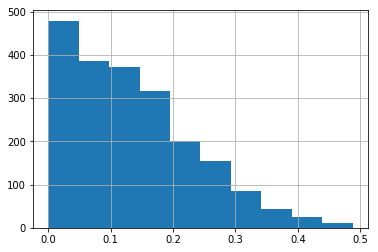

In [99]:
df_img_pred_clean['p2_conf'].hist()

#### Saving Final Clean Data

In [100]:
twitter_archive_master = df_tw_en_clean.copy()
csv_file = 'twitter-archive-master.csv'
twitter_archive_master.to_csv(csv_file, index=False)

In [101]:
twitter_archive_master.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,retweet_count,favorite_count,dog_breed
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,6514.0,33819.0,Chihuahua
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,NaN,NaN,Chihuahua
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,8964.0,42908.0,Labrador Retriever
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,NaN,NaN,Basset


## Analysis

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [103]:
twitter_archive_master

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,retweet_count,favorite_count,dog_breed
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,6514.0,33819.0,Chihuahua
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,NaN,NaN,Chihuahua
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,8964.0,42908.0,Labrador Retriever
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,NaN,NaN,Basset
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,None,NaN,3261.0,20562.0,Chesapeake Bay Retriever
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10.0,Jax,NaN,NaN,NaN,Appenzeller
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,10.0,None,NaN,16716.0,56848.0,Pomeranian
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13.0,10.0,Zoey,NaN,NaN,NaN,Irish Terrier
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,Cassie,doggo,7711.0,32467.0,Pembroke


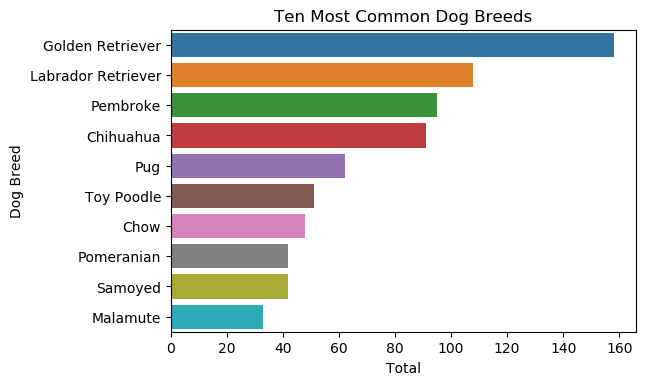

In [104]:
# Plot 10 most dog breeds
top_breeds = (twitter_archive_master.dog_breed.value_counts()
              .head(10)
              .to_frame()
              .reset_index()
              .rename(columns={'index': 'dog_breed', 'dog_breed': 'total'}))
top_breeds['dog_breed'] = top_breeds['dog_breed'].str.title()
plt.figure(dpi=100);
ax = sns.barplot(x='total', y='dog_breed', data=top_breeds);
ax.set_title('Ten Most Common Dog Breeds');
ax.set_ylabel('Dog Breed');
ax.set_xlabel('Total');

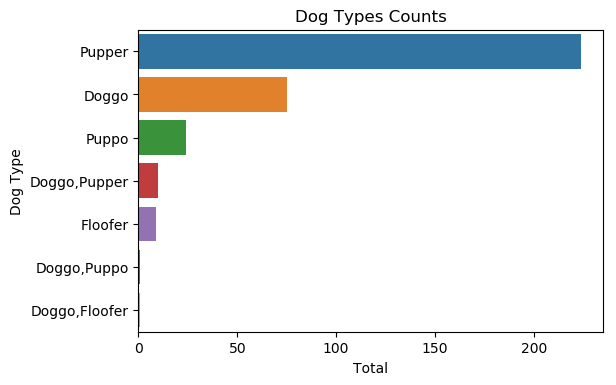

In [105]:
# Plot 10 most dog breeds
top_types = (twitter_archive_master.dog_type.value_counts()
              .head(10)
              .to_frame()
              .reset_index()
              .rename(columns={'index': 'dog_type', 'dog_type': 'total'}))
top_types['dog_type'] = top_types['dog_type'].str.title()
plt.figure(dpi=100);
ax = sns.barplot(x='total', y='dog_type', data=top_types);
ax.set_title('Dog Types Counts');
ax.set_ylabel('Dog Type');
ax.set_xlabel('Total');

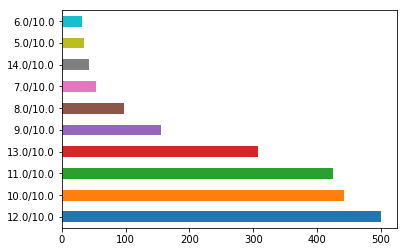

In [106]:
twitter_archive_master['rating'] = twitter_archive_master['rating_numerator'].astype(str) + "/" + twitter_archive_master['rating_denominator'].astype(str)
twitter_archive_master.rating.value_counts()[:10].plot(kind='barh')

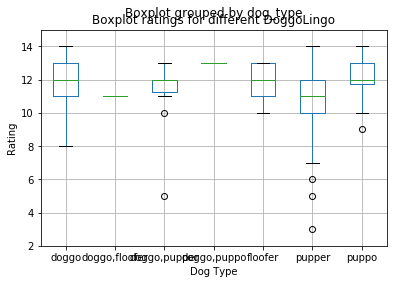

In [107]:
# Plot the dog type ratings
twitter_archive_master[pd.notnull(twitter_archive_master['dog_type'])].boxplot(column = ['rating_numerator'], by = ['dog_type'])
plt.ylim((2,15))
plt.title('Boxplot ratings for different DoggoLingo')
plt.xlabel('Dog Type')
plt.ylabel('Rating');

In [108]:
Breed_rating_Count=twitter_archive_master.groupby(['dog_breed','rating'])["rating"].count().to_frame()

In [109]:
Breed_rating_Count=Breed_rating_Count.add_suffix('_Count').reset_index()


In [110]:
Breed_rating_Count.columns

Index(['dog_breed', 'rating', 'rating_Count'], dtype='object')

Text(0.5,0,'rating')

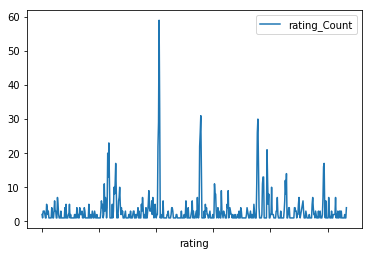

In [111]:
Breed_rating_Count.plot(x='rating', y = 'rating_Count' )
plt.xlabel('rating')


In [112]:
twitter_archive_master

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,retweet_count,favorite_count,dog_breed,rating
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,NaN,NaN,NaN,13.0/10.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,6514.0,33819.0,Chihuahua,13.0/10.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,NaN,NaN,Chihuahua,12.0/10.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,8964.0,42908.0,Labrador Retriever,13.0/10.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,NaN,NaN,Basset,12.0/10.0
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,None,NaN,3261.0,20562.0,Chesapeake Bay Retriever,13.0/10.0
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10.0,Jax,NaN,NaN,NaN,Appenzeller,13.0/10.0
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,10.0,None,NaN,16716.0,56848.0,Pomeranian,13.0/10.0
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13.0,10.0,Zoey,NaN,NaN,NaN,Irish Terrier,13.0/10.0
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,Cassie,doggo,7711.0,32467.0,Pembroke,14.0/10.0


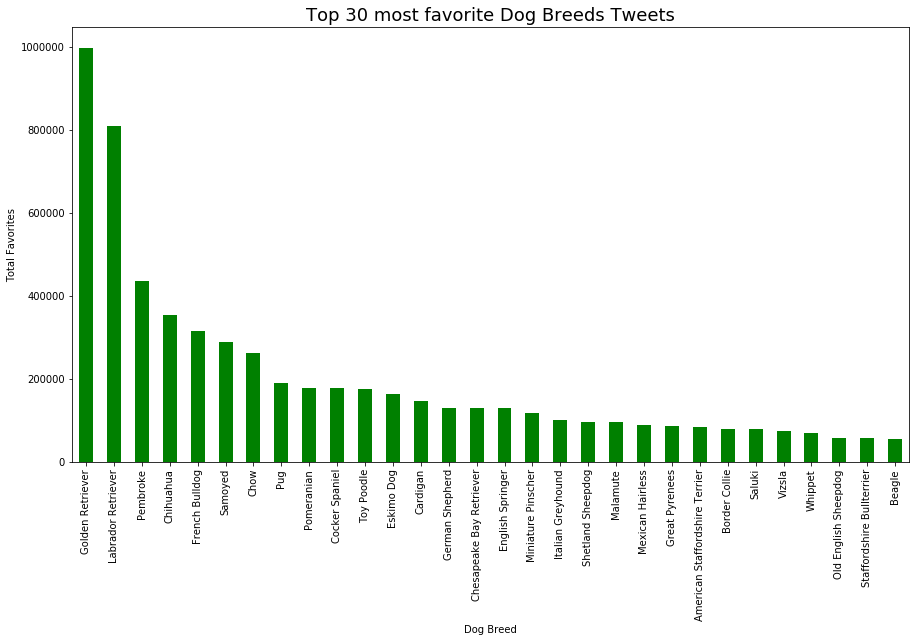

In [113]:
# Total Favorites per dog breed
fig = plt.figure(figsize=(15,8))
dog_breed_favorites=twitter_archive_master.groupby('dog_breed')['favorite_count'].sum()
dog_breed_favorites.sort_values(ascending=False).nlargest(30).plot(kind='bar',color='green')
plt.title("Top 30 most favorite Dog Breeds Tweets",fontsize=18)
plt.ylabel("Total Favorites")
plt.xlabel("Dog Breed");

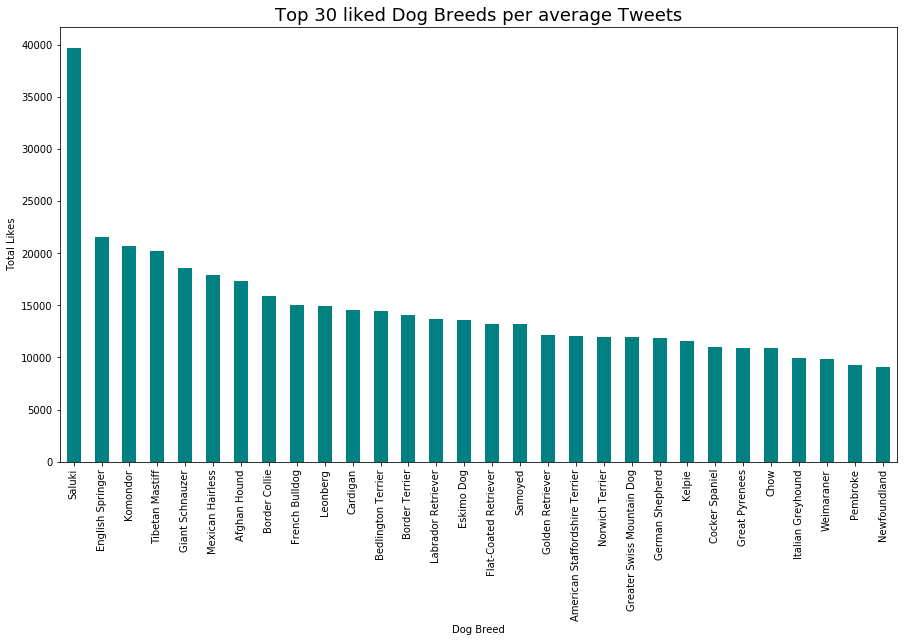

In [114]:
# Average favorites per dog breed tweet
fig = plt.figure(figsize=(15,8))
dog_breed_favorites=twitter_archive_master.groupby('dog_breed')['favorite_count'].sum()/twitter_archive_master.groupby('dog_breed')['favorite_count'].count()
dog_breed_favorites.sort_values(ascending=False).nlargest(30).plot(kind='bar',color='teal')
plt.title("Top 30 liked Dog Breeds per average Tweets",fontsize=18)
plt.ylabel("Total Likes")
plt.xlabel("Dog Breed");

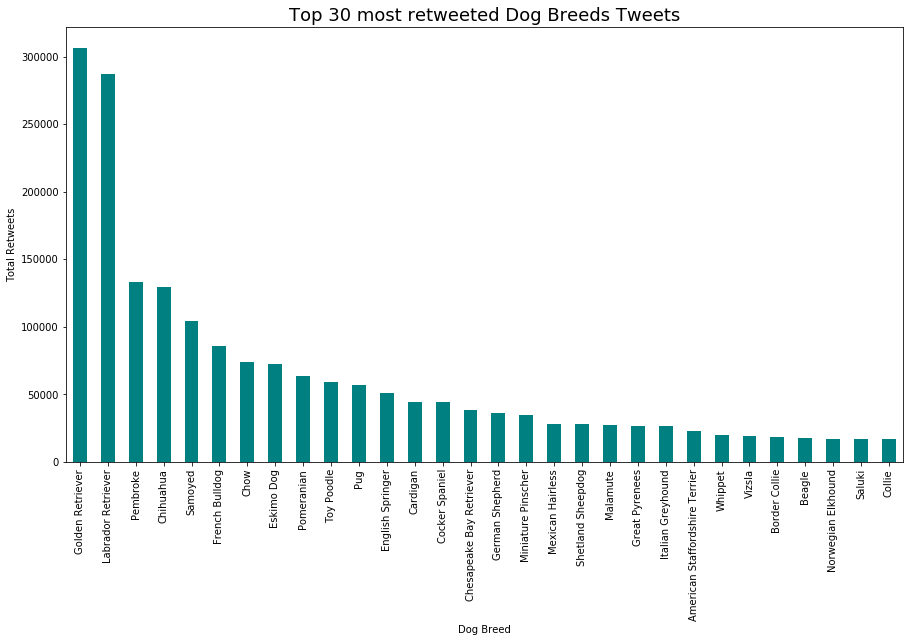

In [115]:
# Total Retweets per dog breed
fig = plt.figure(figsize=(15,8))
dog_breed_favorites=twitter_archive_master.groupby('dog_breed')['retweet_count'].sum()
dog_breed_favorites.sort_values(ascending=False).nlargest(30).plot(kind='bar',color='teal')
plt.title("Top 30 most retweeted Dog Breeds Tweets",fontsize=18)
plt.ylabel("Total Retweets")
plt.xlabel("Dog Breed");

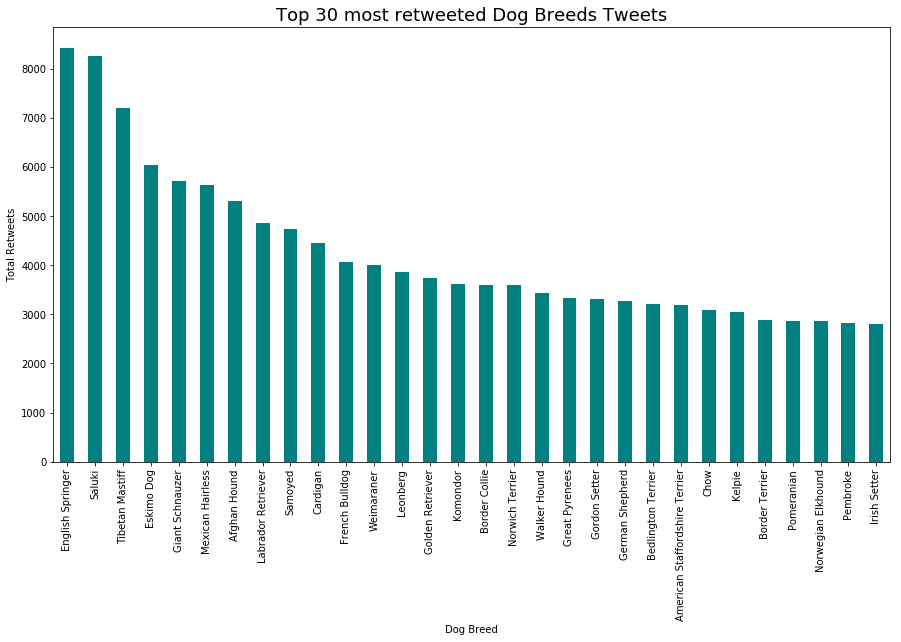

In [116]:
# Total Retweets per dog breed
fig = plt.figure(figsize=(15,8))
dog_breed_favorites=twitter_archive_master.groupby('dog_breed')['retweet_count'].sum()/twitter_archive_master.groupby('dog_breed')['retweet_count'].count()
dog_breed_favorites.sort_values(ascending=False).nlargest(30).plot(kind='bar',color='teal')
plt.title("Top 30 most retweeted Dog Breeds Tweets",fontsize=18)
plt.ylabel("Total Retweets")
plt.xlabel("Dog Breed");

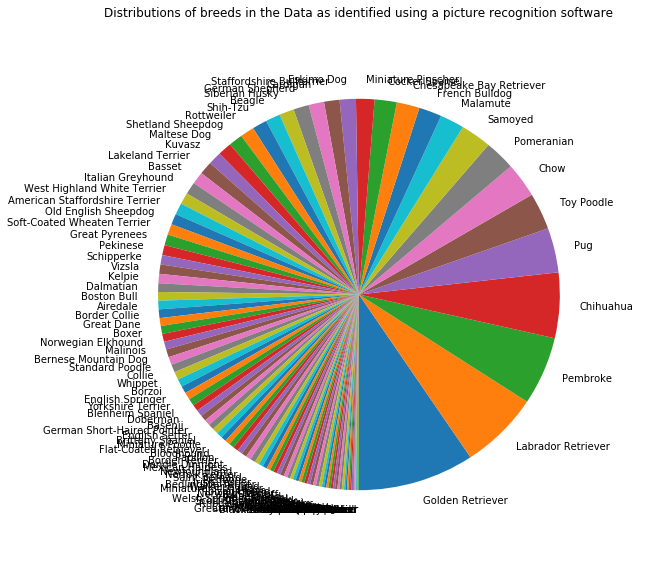

In [117]:

plt.rcParams['figure.figsize']=(10,10)


twitter_archive_master[pd.notnull(twitter_archive_master.dog_breed)]['dog_breed'].value_counts(sort=True).plot.pie(startangle=270, pctdistance=0.8, radius = 0.9)
plt.title('Distributions of breeds in the Data as identified using a picture recognition software')
plt.ylabel('')
plt.show();

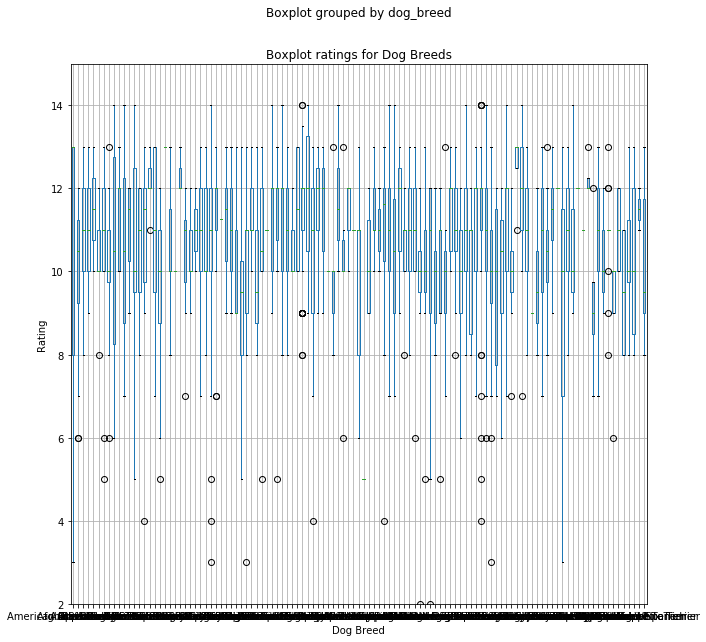

In [118]:
# Plot the dog type ratings
breeds_rating = (twitter_archive_master.dog_breed.value_counts()
              .head(10)
              .to_frame()
              .reset_index()
              .rename(columns={'index': 'dog_breed', 'dog_breed': 'total'}))
twitter_archive_master[pd.notnull(twitter_archive_master['dog_breed'])].boxplot(column = ['rating_numerator'], by = ['dog_breed'])
plt.ylim((2,15))
plt.title('Boxplot ratings for Dog Breeds')
plt.xlabel('Dog Breed')
plt.ylabel('Rating');

In [119]:
twitter_archive_master['dog_breed'].nunique()

113

In [120]:
data['created_at']
data['id_str']
data['full_text']
data['truncated']
data['display_text_range']
data['entities']
data['extended_entities']
data['source']
data['in_reply_to_status_id']
data['in_reply_to_status_id_str']
data['in_reply_to_user_id']
data['in_reply_to_user_id_str']
data['in_reply_to_screen_name']
data['user']
data['geo']
data['coordinates']
data['place']
data['contributors']
data['is_quote_status']
data['retweet_count']
data['favorite_count']
data['favorited']
data['retweeted']
data['possibly_sensitive']
data['possibly_sensitive_appealable']
data['lang']

'en'

In [121]:
data['extended_entities']


{'media': [{'id': 666020881337073664,
   'id_str': '666020881337073664',
   'indices': [108, 131],
   'media_url': 'http://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg',
   'url': 'https://t.co/BLDqew2Ijj',
   'display_url': 'pic.twitter.com/BLDqew2Ijj',
   'expanded_url': 'https://twitter.com/dog_rates/status/666020888022790149/photo/1',
   'type': 'photo',
   'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
    'small': {'w': 340, 'h': 255, 'resize': 'fit'},
    'medium': {'w': 600, 'h': 450, 'resize': 'fit'},
    'large': {'w': 960, 'h': 720, 'resize': 'fit'}}}]}